# An agent-based approach to labor and good supply and demand

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [244]:
# a. imports
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# b. other documents
from functions_1 import *
from class_1 import *

# c. autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description



Our model follows the basic principles of supply and demand for both the labor and the goods market, but with two independent agents: The persons and the firms. Both of them interact on both markets and they determine their equilibrium price and wage.

**Assumptions:** 

Each agent has the same bargaining power.

Only one homogeneous good is sold, therefore there isn't any preference over the other.

All the firms are homogeneous, therefore there isn´t any preference of working there over other firms.

All the individuals are homogeneous, therefore they have the same skill and productivity.

## The goods market

The good market is characterized by a demand curve which represents the willingness to pay of the buyers, which are the persons. On the other side, the supply curve represents the willingness to sell of the sellers, which are the firms. Where the two curves meet will create an equilibrium where quantity demanded is equal to quantity supplied, and gives an equilibrium price.

**How it works:**

In our model, the sellers will have a set minimum price they are willing to sell a good, and the buyers will have a maximum price they are willing to buy a good, and both will never transgress these limits.

The sellers will be selling one good at a set price everyday, and the buyers will have an expected price for that good in that day.

If the price set by the seller is not superior than the expected price of the buyer, then a successful trade will happen. Then, next day, that seller will set a higher price, while the buyer will expect a lower price.

Otherwise, if the trade does not happen, at the end of the day, the sellers that didn't sell will decrease their prices and the buyers that did not buy will accept a higher price.

In the long run, these interactions will converge in an equilibrium price for the good, where the amount of sellers willing to sell is the same as the amount of buyers willing to buy.

**Example:** if we simulate one person and two firms, the equilibrium price will be such that one firm will be driven out of the market, and the buyer only buys from the other one.

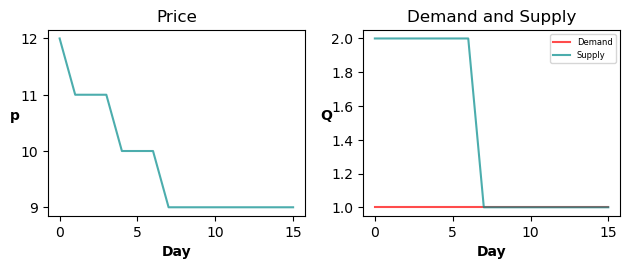

In [245]:
# a. parameters
p_dem_func = lambda x: 15
p_sup_func = lambda x: 5*x
initial_p = 12
n_days = 16

# b. plot
plot_func(p_dem_func,p_sup_func,initial_p,n_days=n_days,n_persons=1,n_firms=2,only_goods=True)


As we can see, supply converged with demand right when price reached 9 and one of the firms could not support that price.

## Labor market

The labor market is characterized by a demand curve which represents the firms' willingness to employ at a given wage and the supply is the willingness to work for a given wage. Since persons only care about the real wage they receive, meaning the amount of goods they can buy with their wage on the goods market, we decided to do the labor market with the real wage. Where the two curves meet will create an equilibrium where labor demanded is equal to labor supplied, and gives an equilibrium real wage. To translate into nominal wage, you only have to multiply by the price of the goods market.

The agents behave in a similar way that in the goods market. The only difference is that the wage is decided nominaly, while the boundaries (minimum wage for persons and maximum wage for firms) are in terms of real wage. To make it work, we translated the boundary wages into nominal terms, so that those limits are imposed, and they find and equilibrium nominally.

**Example:** If we simulate one person and two firms, these firms will compete wages until one of them is driven out of the market.

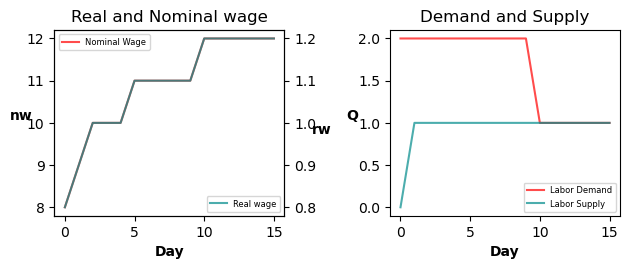

In [246]:
# a. parameters
rw_dem_func = lambda x: 1.5 - 0.2 * x
rw_sup_func = lambda x: 0.8
n_days = 16
initial_w = 8
initial_p = 10

# b. plot
plot_func(rw_dem_func=rw_dem_func,rw_sup_func=rw_sup_func,initial_p=initial_p,initial_w=initial_w,n_days=n_days,n_persons=1,n_firms=2,only_labor=True)

As shown here, supply and demand converge to 1, when real wage goes to 1.2. This is because one of the firms isn't able to compete with the other firm, then it is driven out of the market.

## Both markets together

If we simulate both markets together we will obtain an interaction effect from prices to wages. The more prices increase, the bigger the equilibrium nominal wage will be, just to maintain a constant real wage. Therefore, both market grow together.

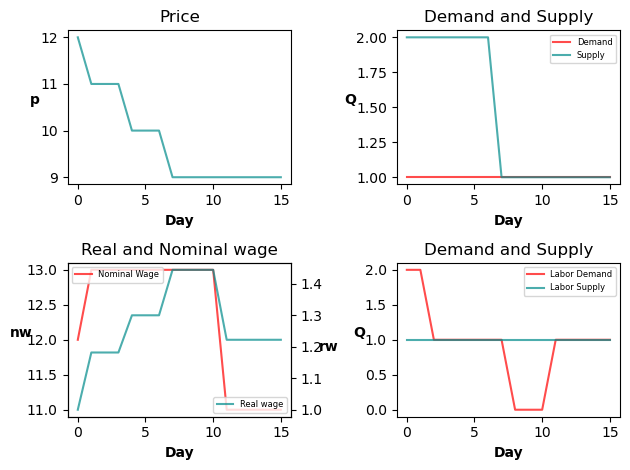

In [247]:
# a. parameters
p_dem_func = lambda x: 15
p_sup_func = lambda x: 5*x
rw_dem_func = lambda x: 1.5 - 0.2 * x
rw_sup_func = lambda x: 0.8
n_days = 16
initial_w = 12
initial_p = 12

# b. plot 
plot_func(p_dem_func, p_sup_func,initial_p, rw_dem_func, rw_sup_func, initial_w, n_days, n_persons=1, n_firms=2)


Concluding, the price will converge to the same as we saw before, and so did real wage, but nominal wage decreased as we can see.

## Analytical solution

In this project, we'll be using set equations for both demand and supply in both markets, which is set for 25 firms and 25 persons. If needed, they will be stretched to fit more agents.

In [248]:
# a. goods market equations
Qs = sm.symbols("Q_s")
Qd = sm.symbols("Q_d")
p = sm.symbols("p")

inv_Q_dem = sm.Eq(p,55 - 2*Qd)
inv_Q_sup = sm.Eq(p,2*Qs)

# b. labor market equations
Ls = sm.symbols("L_s")
Ld = sm.symbols("L_d")
rw = sm.symbols("w")

inv_L_dem = sm.Eq(rw,2.16 - 0.08*Ld)
inv_L_sup = sm.Eq(rw,0.08*Ls + 0.16)

\begin{cases}p = 55 - 2 Q_{d}\\p = 2 Q_{s}\\w = 2.16 - 0.08 L_{d}\\w = 0.08 L_{s} + 0.16\end{cases}

In [249]:
# a. solving the good market equilibrium
Q = sm.solve(inv_Q_dem,Qd)[0]
p_eq = inv_Q_sup.subs(Qs,Q)
P = sm.solve(p_eq,p)[0]
Q = Q.subs(p,P)

# b. solving the labor market equilibrium
L = sm.solve(inv_L_dem,Ld)[0]
w_eq = inv_L_sup.subs(Ls,L)
W = sm.solve(w_eq,rw)[0]
L = L.subs(rw,W)
nom_w = W * P

# c. print
print("With these set of equations we have the following equilibriums:" +
      f"\nGoods market: Q* = {Q}, p* = {P}" +
      f"\nLabor market: L* = {L:.1f}, rw* = {W:.2f}, nw* = {nom_w:.1f}")

With these set of equations we have the following equilibriums:
Goods market: Q* = 55/4, p* = 55/2
Labor market: L* = 12.5, rw* = 1.16, nw* = 31.9


Now, we have to test if this happens in our model.

## Numerical solution

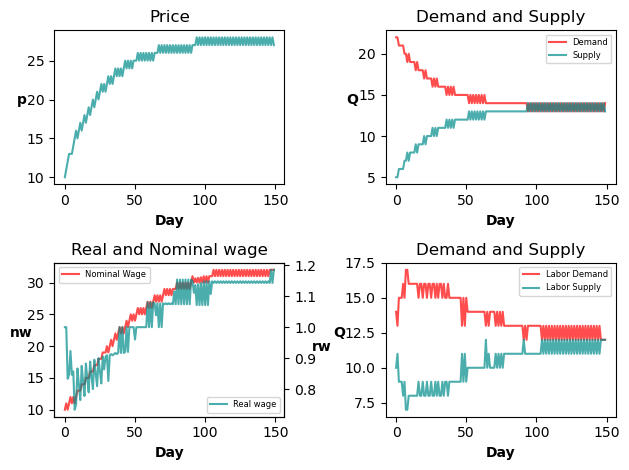

In [250]:
p_dem_func = lambda x: 55 - 2*x
p_sup_func = lambda x: 2*x
rw_dem_func = lambda x: 2.16 - 0.08*x
rw_sup_func = lambda x: 0.08*x + 0.16

n_days = 150
initial_w = 10
initial_p = 10


plot_func(p_dem_func, p_sup_func,initial_p, rw_dem_func, rw_sup_func, initial_w, n_days, n_persons=25, n_firms=25)

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [282]:
interact()

interactive(children=(IntSlider(value=25, description='n_persons', max=50, min=1), Output()), _dom_classes=('w…

interactive(children=(FloatSlider(value=-50.0, description='a', max=-5.0, min=-50.0), FloatSlider(value=55.0, …

# Further analysis

We tried to make an extension to give cash and stock constraints to the agents, but it failed, since in all cases, the persons would keep all of the money of the firms. We believe that a more rational firm agent would probably work better (for example, setting its maximum price to the average cost, so they never get losses). But on the other side, this could lead to the firms getting all the cash, since this is a closed economy.

We are too working on the interactive part of the model to create more good predictions.

In [252]:
?economy_simulation

Init signature:
economy_simulation(
    p_dem_func=None,
    p_sup_func=None,
    initial_p=None,
    rw_dem_func=None,
    rw_sup_func=None,
    initial_w=None,
    n_days=30,
    n_persons=25,
    n_firms=25,
    only_goods=False,
    only_labor=False,
)
Docstring:      <no docstring>
Init docstring:
Creates an economy simulation

Parameters:

Good market:
p_dem_func: function; good demand function of the economy
p_sup_func: function; good supply function of the economy
initial_p: int; initial price of the economy

Labor market:
rw_dem_func: function; labor demand function of the economy, in real wage terms
rw_dem_func: function; labor supply function of the economy, in real wage terms
initial_w: int; in nominal wage terms

Simulation:
n_days: int; number of simulation days
n_persons: int; number of simulated persons
n_firms: int; number of simulated firms

Other:
only_goods: bool; If true, only the good market will be simulated, and you don't need to input the Labor Market Parameter

In [257]:
caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

# Conclusion

Our agent-based model can converge to the equilibriums of both markets in a very precise way, even though it is way more ineffient than just computing the formulas. Either way, this shows how individual, uncoordinated actions can lead to a coordinated result.